# Data Cleaning, Pre-Processing, Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import cluster, metrics, decomposition
from sklearn.preprocessing import LabelEncoder

In [2]:
student_mat = pd.read_csv("student-mat.csv")
student_por = pd.read_csv("student-por.csv")

df1 = pd.DataFrame(student_mat)
df2 = pd.DataFrame(student_por)

In [3]:
df1['classroom'] = 'mat'
df2['classroom'] = 'por'

df = pd.concat([df1, df2])
df=df.drop_duplicates(["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"])
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,classroom
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,mat
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,mat
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,mat
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,mat
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,mat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,MS,F,19,R,GT3,A,1,1,at_home,at_home,...,5,4,1,4,1,0,8,0,0,por
611,MS,F,18,R,GT3,T,2,2,services,other,...,2,1,1,1,4,5,14,14,15,por
618,MS,F,18,R,LE3,A,1,2,at_home,other,...,3,4,1,4,5,0,16,15,15,por
632,MS,F,19,R,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,7,8,9,por


Combined Portuegues class and Math classes together and dropped duplicate data

In [4]:

df['school'] = df['school'].map({'GP': 1, 'MS': 0})
df['paid'] = df['paid'].map({'yes': 1, 'no': 0})
df['schoolsup'] = df['schoolsup'].map({'yes': 1, 'no': 0})
df['famsup'] = df['famsup'].map({'yes': 1, 'no': 0})
df['activities'] = df['activities'].map({'yes': 1, 'no': 0})
df['nursery'] = df['nursery'].map({'yes': 1, 'no': 0})
df['internet'] = df['internet'].map({'yes': 1, 'no': 0})
df['romantic'] = df['romantic'].map({'yes': 1, 'no': 0})
df['higher'] = df['higher'].map({'yes': 1, 'no': 0})
df['sex'] = df['sex'].map({'M': 1, 'F': 0})
df['Pstatus'] = df['Pstatus'].map({'T': 1, 'A': 0})
df['address'] = df['address'].map({'U': 1, 'R': 0})
df['famsize'] = df['famsize'].map({'LE3': 1, 'GT3': 0})
lb_make = LabelEncoder()
df["Mjob"] = lb_make.fit_transform(df["Mjob"])
df["Fjob"] = lb_make.fit_transform(df["Fjob"])
df["reason"] = lb_make.fit_transform(df["reason"])
df["guardian"] = lb_make.fit_transform(df["guardian"])

All binary values changed to 1's or 0's 

In [5]:
#Descriptive Stats
df.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,...,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000
mean,0.655589,0.410876,16.812689,0.696375,0.303625,0.874622,2.492447,2.293051,1.930514,2.208459,...,3.938066,3.184290,3.172205,1.504532,2.282477,3.531722,4.930514,10.728097,10.708459,10.725076
std,0.475535,0.492365,1.269194,0.460170,0.460170,0.331397,1.130958,1.094027,1.249995,0.872537,...,0.941930,1.060583,1.161907,0.926567,1.290121,1.434835,6.858060,3.082098,3.529588,4.106738
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,2.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,8.000000,9.000000,9.000000
50%,1.000000,0.000000,17.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,3.000000,10.000000,11.000000,11.000000
75%,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,3.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,13.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [6]:
#Change all object types to category types
cols = ['school', 'sex', 'address', 'famsize','Pstatus', 'Mjob','Fjob','reason','guardian','schoolsup',
        'famsup','paid','activities','nursery','higher','internet','romantic','classroom']
df[cols] = df[cols].astype('category')

In [7]:
#Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 662 entries, 0 to 642
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      662 non-null    category
 1   sex         662 non-null    category
 2   age         662 non-null    int64   
 3   address     662 non-null    category
 4   famsize     662 non-null    category
 5   Pstatus     662 non-null    category
 6   Medu        662 non-null    int64   
 7   Fedu        662 non-null    int64   
 8   Mjob        662 non-null    category
 9   Fjob        662 non-null    category
 10  reason      662 non-null    category
 11  guardian    662 non-null    category
 12  traveltime  662 non-null    int64   
 13  studytime   662 non-null    int64   
 14  failures    662 non-null    int64   
 15  schoolsup   662 non-null    category
 16  famsup      662 non-null    category
 17  paid        662 non-null    category
 18  activities  662 non-null    category
 19  nursery 

No missing values

In [8]:
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.119031,-0.133645,0.014530,0.001454,0.280021,-0.008453,-0.002414,0.094744,0.130655,0.069320,-0.013347,0.168313,-0.113206,-0.130408,-0.127446
Medu,-0.119031,1.000000,0.635156,-0.239830,0.104501,-0.163166,0.010211,-0.011450,0.022866,-0.018013,-0.036381,-0.002183,0.095703,0.208172,0.202776,0.182611
Fedu,-0.133645,0.635156,1.000000,-0.189146,0.045236,-0.170862,0.016171,0.009450,0.053071,-0.008774,0.032370,0.038402,0.068048,0.185636,0.156541,0.137159
traveltime,0.014530,-0.239830,-0.189146,1.000000,-0.066172,0.078820,-0.010459,-0.007536,0.039607,0.084199,0.060548,-0.045230,-0.049896,-0.071572,-0.111347,-0.073488
studytime,0.001454,0.104501,0.045236,-0.066172,1.000000,-0.125250,0.003935,-0.077845,-0.078264,-0.139678,-0.220301,-0.054130,-0.039015,0.172011,0.133655,0.097863
failures,0.280021,-0.163166,-0.170862,0.078820,-0.125250,1.000000,-0.068134,0.114463,0.060217,0.088939,0.084924,0.035372,0.087584,-0.368938,-0.360881,-0.359377
famrel,-0.008453,0.010211,0.016171,-0.010459,0.003935,-0.068134,1.000000,0.140165,0.091317,-0.069881,-0.092647,0.109476,-0.067647,0.060893,0.052807,0.061296
freetime,-0.002414,-0.011450,0.009450,-0.007536,-0.077845,0.114463,0.140165,1.000000,0.332688,0.117690,0.127746,0.088609,-0.042332,-0.040185,-0.061199,-0.058860
goout,0.094744,0.022866,0.053071,0.039607,-0.078264,0.060217,0.091317,0.332688,1.000000,0.252217,0.404503,0.002163,0.025046,-0.093786,-0.091030,-0.081691
Dalc,0.130655,-0.018013,-0.008774,0.084199,-0.139678,0.088939,-0.069881,0.117690,0.252217,1.000000,0.618431,0.065323,0.125517,-0.112935,-0.084944,-0.075212


We notice high (greater than 0.5) correlation between the following:
    - Fedu and Medu at 0.642063
    - Walc and Dalc at 0.627814
    - G1 and G2 at 0.858739
    - G1 and G3 at 0.809142
    - G2 and G3 at 0.910743
This indicated that these attributes can be reduced

In [9]:
df['Dalc'] = df.Dalc.astype(int)
df['Walc'] = df.Walc.astype(int)

sum_column = (df["Dalc"] + df["Walc"])/2
df["Alc"] = sum_column

del df['Dalc']
del df['Walc']

In [10]:
df['Avg_Grade'] = (df['G1'] + df['G2'] + df['G3']) / 3
df = df.drop(['G1','G2','G3'], axis=1)

In [11]:
df['Pedu'] = (df['Fedu'] + df['Medu'])/2
df = df.drop(['Fedu', 'Medu'], axis = 1)

In [12]:
df.cov()

,age,traveltime,studytime,failures,famrel,freetime,goout,health,absences,Alc,Avg_Grade,Pedu
age,1.610852,0.013698,0.001527,0.254476,-0.010106,-0.003250,0.139718,-0.024306,1.465028,0.133577,-0.563771,-0.178213
traveltime,0.013698,0.551750,-0.040669,0.041921,-0.007317,-0.005937,0.034183,-0.048206,-0.254179,0.057987,-0.226652,-0.177592
studytime,0.001527,-0.040669,0.684599,-0.074203,0.003067,-0.068312,-0.075241,-0.064262,-0.221385,-0.171122,0.387170,0.069368
failures,0.254476,0.041921,-0.074203,0.512690,-0.045953,0.086923,0.050098,0.036341,0.430086,0.068728,-0.927665,-0.132988
famrel,-0.010106,-0.007317,0.003067,-0.045953,0.887233,0.140024,0.099940,0.147959,-0.436988,-0.086787,0.196484,0.013771
freetime,-0.003250,-0.005937,-0.068312,0.086923,0.140024,1.124836,0.409971,0.134841,-0.307901,0.145223,-0.205607,-0.001385
goout,0.139718,0.034183,-0.075241,0.050098,0.099940,0.409971,1.350028,0.003606,0.199579,0.438942,-0.366327,0.048754
health,-0.024306,-0.048206,-0.064262,0.036341,0.147959,0.134841,0.003606,2.058750,-0.392649,0.153535,-0.222337,0.028370
absences,1.465028,-0.254179,-0.221385,0.430086,-0.436988,-0.307901,0.199579,-0.392649,47.032986,0.978973,-0.746125,0.626424
Alc,0.133577,0.057987,-0.171122,0.068728,-0.086787,0.145223,0.438942,0.153535,0.978973,1.000366,-0.387597,-0.008791


C:\Users\louie.DESKTOP-C1CTRTD\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\louie.DESKTOP-C1CTRTD\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


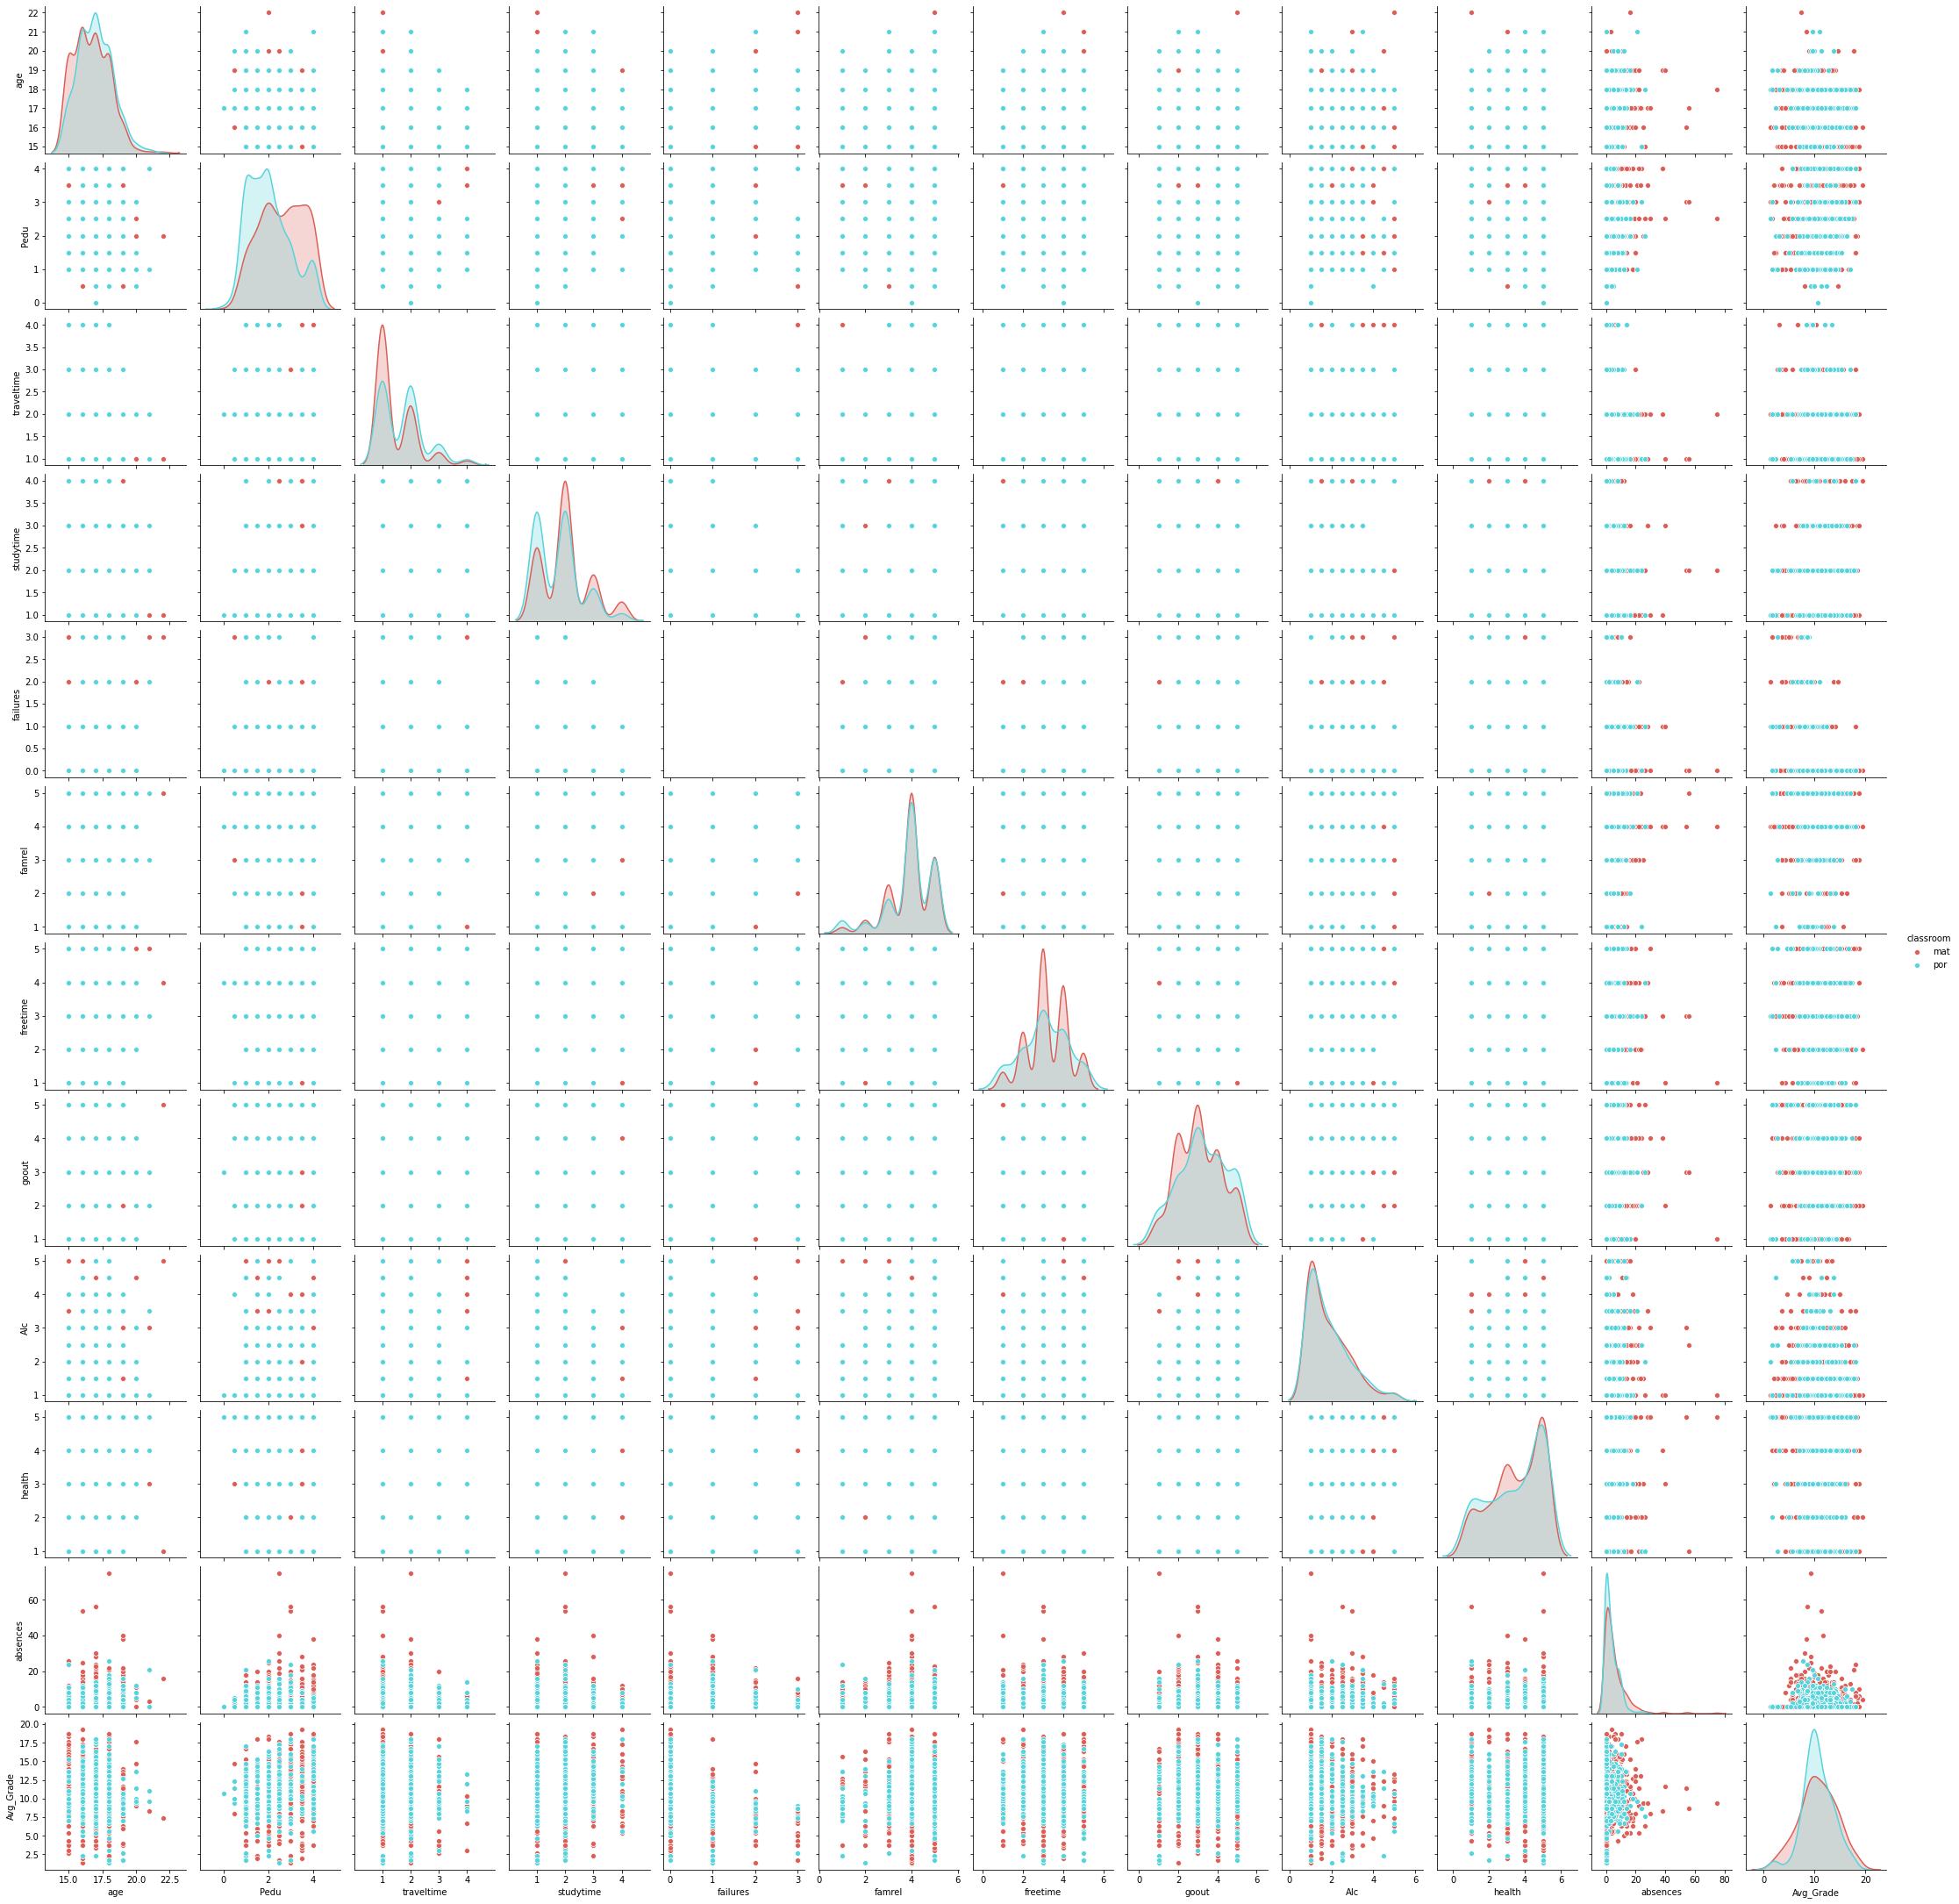

In [15]:
#Scatterplot of data based on class taken (Math or Porteguese)

sb.pairplot(df, hue='classroom', palette='hls', vars = ['age','Pedu','traveltime','studytime','failures','famrel','freetime','goout','Alc','health','absences','Avg_Grade'])